In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from imblearn.over_sampling import RandomOverSampler

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Create your feature matrix X and target variable y
X = data.drop('Class', axis=1)
y = data['Class']

In [6]:
# Perform Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto')
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Create a DataFrame for the oversampled data
oversampled_data = pd.DataFrame(X_oversampled, columns=data.columns.drop('Class'))
oversampled_data['Class'] = y_oversampled

fraud = oversampled_data[oversampled_data['Class'] == 1]
valid = oversampled_data[oversampled_data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(oversampled_data[oversampled_data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(oversampled_data[oversampled_data['Class'] == 0])))

1.0
Fraud Cases: 284315
Valid Transactions: 284315


In [7]:
oversampled_data.shape
oversampled_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,87777.984885,-2.372958,1.807695,-3.506551,2.266662,-1.571024,-0.698359,-2.772465,0.290715,-1.286030,...,0.353445,0.007727,-0.019814,-0.052769,0.020559,0.025576,0.084804,0.037810,105.098376,0.5
std,48190.005843,5.512419,3.706262,6.212654,3.204247,4.212808,1.755646,5.850600,4.843928,2.316603,...,2.779254,1.166603,1.192917,0.565009,0.672400,0.477373,1.015104,0.452819,252.975005,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,46057.000000,-2.866364,-0.143495,-5.111658,-0.106004,-1.796308,-1.574565,-3.069958,-0.203742,-2.309829,...,-0.170769,-0.538375,-0.239303,-0.401236,-0.317195,-0.289576,-0.063374,-0.058955,1.420000,0.0
50%,80233.500000,-0.772934,0.962831,-1.365717,1.318074,-0.426350,-0.648670,-0.641619,0.154612,-0.709896,...,0.148284,0.029755,-0.032977,0.005209,0.049970,-0.015449,0.048920,0.035075,18.960000,0.5
75%,134757.000000,1.044710,2.795414,0.342781,4.243069,0.477721,0.078885,0.270269,0.867588,0.173746,...,0.650988,0.576738,0.193731,0.373438,0.393383,0.323885,0.454851,0.219021,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.0


In [8]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count    284315.000000
mean        121.905730
std         254.706493
min           0.000000
25%           1.000000
50%           9.210000
75%         105.890000
max        2125.870000
Name: Amount, dtype: float64

In [9]:
print('details of valid transaction')
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

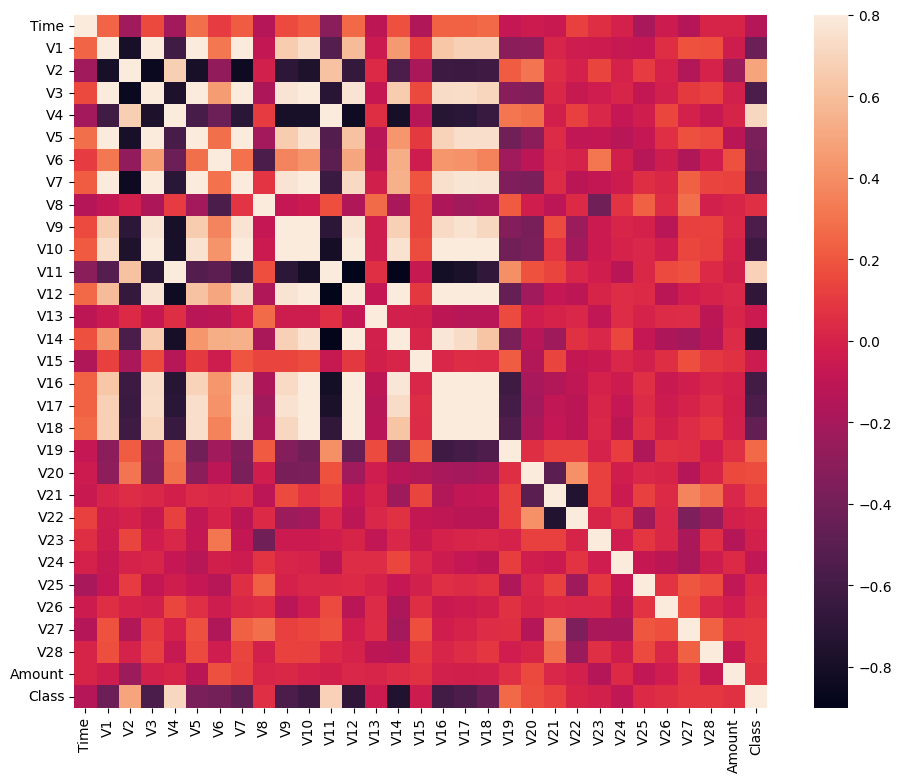

In [10]:
corrmat = oversampled_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [11]:
X = oversampled_data.drop(['Class'], axis = 1)
Y = oversampled_data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(568630, 30)
(568630,)


In [12]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [14]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
  
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9999560346798445
The precision is 0.9999122514522385
The recall is 1.0
The F1-Score is 0.9999561238010829
The Matthews correlation coefficient is0.9999120728626671


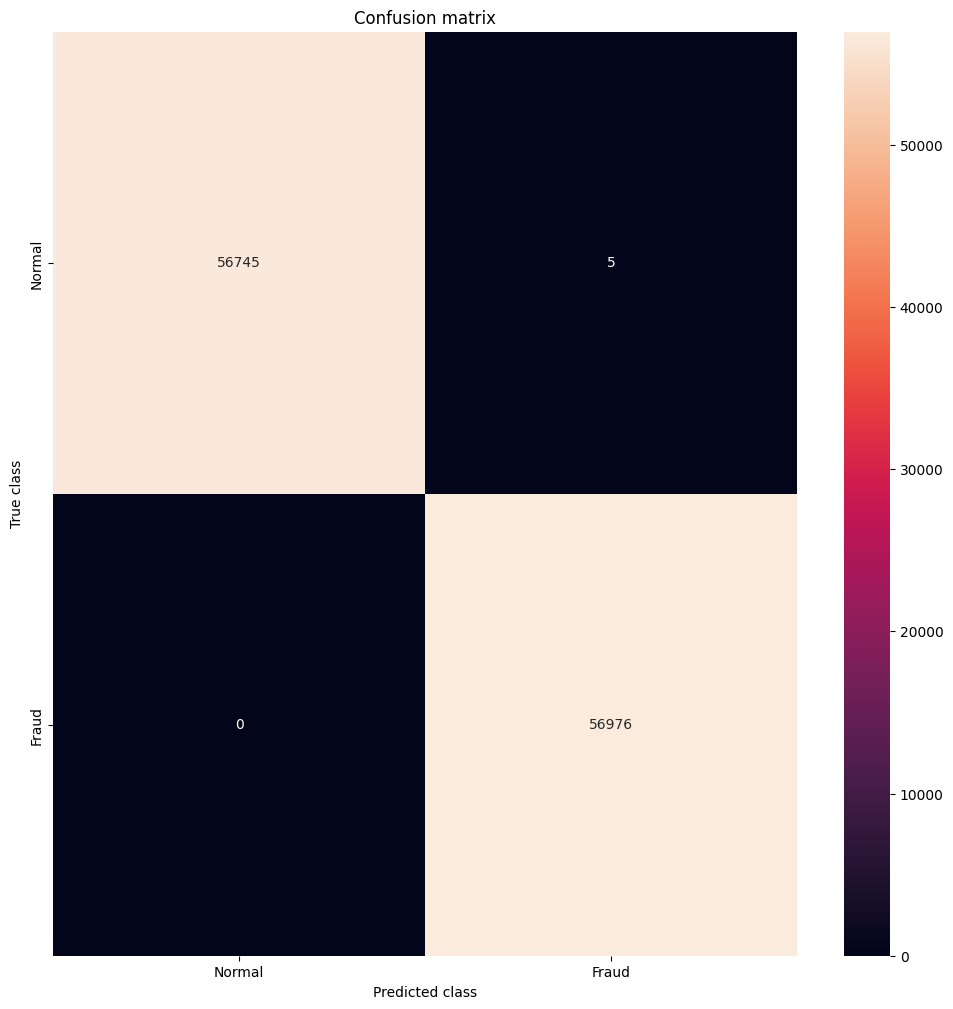

In [15]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()